# Grain Size Analysis Template

Last update: 2024-03-05

> **INFO**  
> This is the template for a general grain size analysis. The specific documentation can be found at the following link:  
> https://github.com/marcoalopez/GrainSizeTools/wiki/2.-Quantifying-grain-size-populations-using-GrainSizeTools-Script  
>
> The template shows typical examples of grain size population analysis and different strategies for presenting them. Modify, delete and add as necessary to create your own analysis procedure.

In [1]:
# Load the script. It is assumed that the notebook is in the same folder
# as the GrainSizeTools.py file, if not specify the full path to the file.
# e.g. %run filepath...\GrainSizeTools_script.py
%run GrainSizeTools_script.py

module plot imported
module averages imported
module stereology imported
module piezometers imported
module template imported

Welcome to GrainSizeTools script
A free open-source cross-platform script to visualize and characterize grain size
population and estimate differential stress via paleopizometers.

Version: 2024.03.RC
Documentation: https://github.com/marcoalopez/GrainSizeTools/wiki

Type get.functions_list() to get a list of the main methods



## Load the data

In [2]:
# specify your file(s) to be analysed here
dataset = pd.read_csv('DATA\data_set.txt', sep='\t')

The above example loads the data into a variable named ``dataset``, assumes that the data is stored in a file named ``data_set.txt`` located within the ``DATA`` folder, and that the column separator (or delimiter) is a tab denoted as ``\t``. Normally the ``read_csv`` method will try to guess the default delimiter/separator type, but to be sure you can pass it by default as in the example. The ``read_csv`` method also assumes that the data is stored in a text-like file (e.g. csv, txt, tsv, dat, etc.) and that the first line contains the column names. Other useful parameters that can be used within the parentheses to load text files with more complex layout are:

- ``header``: Row number(s) in the text file to use as the column names. By default the first row is assumed as the column names (header=0). If there are no column names in the file, you must set ``header=None``.
- ``skiprows``: Number of lines to skip/ignore at the begining of the file (an integer).  
- ``na_filter``: When set to ``True``, it automatically detects missing values in the dataset. False by default.  

For more details on this method, or on loading other file types (e.g. Excel files), see the script documentation.

Once the data has been readed, the first thing to do is to view the data to check that it has loaded correctly, as in the example below.

In [3]:
# display a view of the dataset (check that everything has been loaded correctly)
dataset

,Area,Circ,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity
0,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937
1,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972
2,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972
3,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947
4,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970
...,...,...,...,...,...,...,...,...,...,...
2656,452.50,0.789,28.504,1368.0,1565.5,127.875,22.500,1.235,0.810,0.960
2657,1081.25,0.756,47.909,1349.5,1569.5,108.246,31.363,1.446,0.692,0.960
2658,513.50,0.720,32.962,1373.0,1586.0,112.286,20.496,1.493,0.670,0.953
2659,277.75,0.627,29.436,1316.0,1601.5,159.102,17.002,1.727,0.579,0.920


The example dataset contains 2661 observations and ten columns representing different grain properties measured on a thin section. In this case, the size of the grains is contained in the ``Feret`` column, which corresponds to the "Feret or Caliper diameters" estimated wusing the ImageJ/Fiji application. We could use this column to analyse grain size, but as an illustrative example we will calculate the "Equivalent Circular Diameter" or ECDs, as this is a more standard measure in grain size studies using grain sections, and the apparent diameters will differ slightly from the Feret diameter. ECDs are calculated from the areas of the grain sections using the following formula:

$$
ECD = 2 \sqrt{\text{area} / \pi}
$$

To add a new column with ECDs (we will name it ``ECD``)

In [4]:
# estimate Equivalent Circular Diameters (if needed)
dataset['ECD'] = 2 * np.sqrt(dataset['Area'] / np.pi)

In [5]:
# show the first rows of the data
dataset.head()

,Area,Circ,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,ECD
0,157.25,0.680,18.062,1535.0,0.5,131.634,13.500,1.101,0.908,0.937,14.149803
1,2059.75,0.771,62.097,753.5,16.5,165.069,46.697,1.314,0.761,0.972,51.210889
2,1961.50,0.842,57.871,727.0,65.0,71.878,46.923,1.139,0.878,0.972,49.974587
3,5428.50,0.709,114.657,1494.5,83.5,19.620,63.449,1.896,0.528,0.947,83.137121
4,374.00,0.699,29.262,2328.0,34.0,33.147,16.000,1.515,0.660,0.970,21.821815


Note the new ``ECD`` column.

## Grain size statistics

The ``summarize()`` method is responsible for describing the population of grain sizes. By default, this method returns **several common averages** (central tendency estimators) with corresponding confidence intervals at the 95% level (2-sigma) and (2) **several statistical parameters describing the distribution of grain sizes**. The method will automatically select the most optimal methods for estimating confidence intervals for each of the averages (see documentation for details).

In [6]:
# Describe grain size population
summarize(dataset['ECD'])

 
CENTRAL TENDENCY ESTIMATORS
Arithmetic mean = 34.79 microns
Confidence intervals at 95.0 %
mCox method: 34.43 - 36.04 (-1.0%, +3.6%), length = 1.616
Geometric mean = 30.10 microns
Confidence interval at 95.0 %
CLT method: 29.47 - 30.75 (-2.1%, +2.2%), length = 1.283
Median = 31.53 microns
Confidence interval at 95.0 %
robust method: 30.84 - 32.81 (-2.2%, +4.1%), length = 1.970
Mode (KDE-based) = 24.31 microns
Maximum precision set to 0.1
KDE bandwidth = 4.01 (silverman rule)
 
DISTRIBUTION FEATURES
Sample size (n) = 2661
Standard deviation = 18.32 (1-sigma)
Interquartile range (IQR) = 23.98
Lognormal shape (Multiplicative Standard Deviation) = 1.75
Shapiro-Wilk test warnings:
Data is not normally distributed!
Normality test: 0.93, 0.00 (test statistic, p-value)


If necessary, you can modify the behaviour of this function using various parameters. For example, if you want to ignore a certain type of average or change the confidence levels. For more details, go to the documentation at https://github.com/marcoalopez/GrainSizeTools/wiki/2.-Quantifying-grain-size-populations-using-GrainSizeTools-Script   or type ``summarize()?`` in a cell and run it.

## Plotting grain size populations

All the statistical parameters calculated above only make sense if your population is unimodal. It is therefore imperative to **always display the grain size distribution**. The default plot for this is to display the distribution on a linear scale. The ``plot.distribution()`` function takes care of this. By default it shows the distribution using the histogram and the Kernel Density Estimator or KDE (i.e. the continuous line), as well as the location of the various averages. This function also allows you to change some default values, including the type of plot (histogram, kde) or the type of average(s) to be displayed. You can also adjust the binsize of the histogram or the kernel of the KDE, use the ``?`` help command or the script documentation for specific details. You can also modify the parameters of the plot itself, such as the axis labels, the font size, etc. Some examples are commented on below and there are also more examples in the documentation.

Number of classes =  45
binsize =  3.41
KDE bandwidth =  4.01


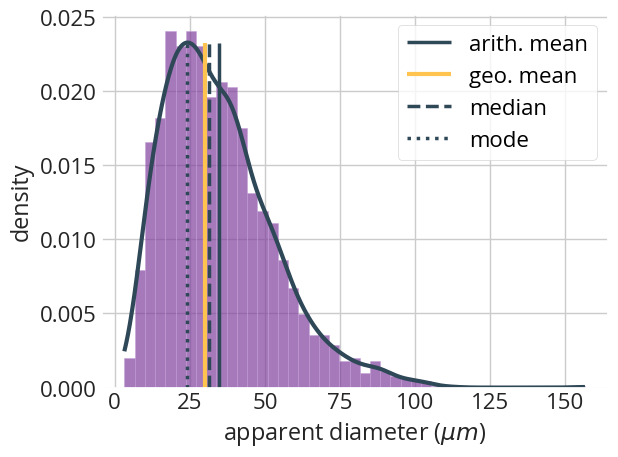

In [7]:
fig1, ax = plot.distribution(dataset['ECD'])

# uncomment the following lines (remove the # at the beginning) or add new oones to change the figure defaults
#ax.set_xlabel('diameters $\mu m$', fontsize=14)  # modify x label
#ax.set_ylabel('probability', fontsize=14)       # modify y label
#ax.set_xticks([0, 50, 100, 150])                # set custom xticks, use 

In [8]:
# uncomment the line below to save the figure
#fig1.savefig('population.png', dpi=300)

## Testing lognormality

Sometimes it can be helpful to test whether the data follow or deviate from a lognormal distribution. For example, to find out if the data are suitable for using the two-step stereological method, or to choose which confidence interval method is optimal.

The script uses two methods to test whether the grain size distribution follows a lognormal distribution. One is a visual method called quantile-quantile or _q-q_ plot and the other is a quantitative test called the [Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test).

To do this we use the function test_lognorm as follows

Shapiro-Wilk test (lognormal):
0.98, 0.01 (test statistic, p-value)
It doesnt look like a lognormal distribution (p-value < 0.05)
(╯°□°）╯︵ ┻━┻


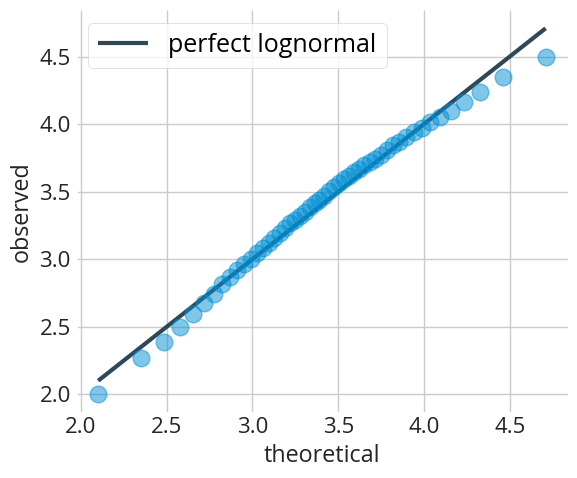

In [9]:
fig2, ax = plot.qq_plot(dataset['ECD'], figsize=(6, 5))

In [10]:
# uncomment the line below to save the figure
#fig2.savefig('qqplot.png', dpi=300)

## Comparing grain size distributions

Let us first create a synthetic population to compare with the example population of apparent grain sizes. As an example, we will use the geometric mean and MSD of the example population to create a random lognormal population with similar characteristics.

In [11]:
new_dataset = averages.gen_lognorm_population(scale=np.log(30.10), # set geometric mean to 30.10
                                              shape=np.log(1.75),  # set lognormal shape to 1.75
                                              n=2700)               # set sample size = 2700

### Using the cumulative distribution function (EDF)

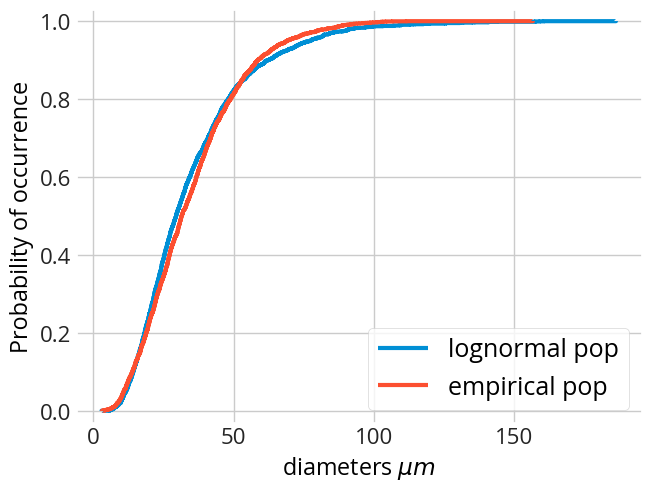

In [23]:
import matplotlib.pyplot as plt

fig3, ax = plt.subplots(constrained_layout=True)

ax.ecdf(new_dataset, label='lognormal pop')
ax.ecdf(dataset['ECD'], label='empirical pop')

ax.set_xlabel('diameters $\mu m$')
ax.set_ylabel("Probability of occurrence")
ax.set_ylim(bottom=-0.03, top=1.03)
# ax.set_xlim(right=101)
ax.legend(loc='best', fontsize=18)

In [22]:
# uncomment the line below to save the figure
#fig3.savefig('ecdf.png', dpi=300)

### Comparing two distributions using the two-sample Kolmogorov–Smirnov test

For details see GrainSizeTools documentation and the following links:  
https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

In [32]:
# import the two-sample Kolmogorov-Smirnov test from Scipy stats module
from scipy.stats import ks_2samp

result = ks_2samp(new_dataset, dataset['ECD'])

print('Two-sample Kolmogorov-Smirnov test:')
print('')
print(f' KS test statistic: {result.statistic:.4f}')
print(f'           p-value: {result.pvalue:.4f}')
print(f'Statistic location: {result.statistic_location:.2f}')

Two-sample Kolmogorov-Smirnov test:

 KS test statistic: 0.0546
           p-value: 0.0006
Statistic location: 26.41


In [33]:
# annotate the date you executed the botebook and the version 
import sys
from datetime import date    
today = date.today().isoformat()

print(f'Notebook last run in {today} using:')
print('Python', sys.version)

Notebook last run in 2024-04-03 using:
Python 3.10.13 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:24:38) [MSC v.1916 64 bit (AMD64)]
